In [1]:
cd drive

/content/drive


In [2]:
cd MyDrive

/content/drive/MyDrive


# New section

In [3]:
ls

'Colab Notebooks'/   datasets/


In [4]:
cd datasets

/content/drive/MyDrive/datasets


In [5]:
ls

test.7z  train/  train.7z  trainLabels.csv


In [6]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.4/390.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 18.3 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

Importing the depdendencies

In [9]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from sklearn.model_selection import train_test_split

In [10]:
fileNames = os.listdir('train')

In [11]:
len(fileNames)

50000

Labels Processing

In [12]:
labels_df = pd.read_csv('trainLabels.csv')

In [13]:
labels_df.shape

(50000, 2)

In [14]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [15]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [16]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


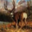

In [17]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('train/3323.png')
cv2_imshow(img)

In [18]:
labels_df.iloc[3322]

id       3323
label    deer
Name: 3322, dtype: object

In [19]:
id_list = list(labels_df['id'])

Image processing

In [20]:
train_data_folder = 'train/'
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [21]:
data[0].shape

(32, 32, 3)

In [22]:
X = np.array(data)
Y = np.array(labels)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
#scaling the data

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Building Neural Network

In [25]:
import tensorflow as tf
from tensorflow import keras

In [27]:
num_of_classes = 10

# setting up layers of NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [28]:
#compile neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [29]:
#training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 10s 8ms/step - loss: 1.9696 - acc: 0.2884 - val_loss: 1.8262 - val_acc: 0.3370
Epoch 2/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.8305 - acc: 0.3414 - val_loss: 1.7878 - val_acc: 0.3580
Epoch 3/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.7837 - acc: 0.3613 - val_loss: 1.7369 - val_acc: 0.3733
Epoch 4/10
1125/1125 [==============================] - 6s 6ms/step - loss: 1.7533 - acc: 0.3734 - val_loss: 1.7292 - val_acc: 0.3815
Epoch 5/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.7392 - acc: 0.3774 - val_loss: 1.7119 - val_acc: 0.3800
Epoch 6/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.7275 - acc: 0.3830 - val_loss: 1.6977 - val_acc: 0.3983
Epoch 7/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.7174 - acc: 0.3886 - val_loss: 1.7366 - val_acc: 0.3840
Epoch 8/10
1125/1125 [==============================] - 8s 7m

Restnet 50

In [30]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [32]:
#include_top = False means we will be adding our own output layer and we don't have same number of output classes like the resnet model
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [38]:
model = models.Sequential()
model.add(layers.UpSampling2D((2, 2))) #height and width is multiplied by (2, 2) 64
model.add(layers.UpSampling2D((2, 2))) # 128
model.add(layers.UpSampling2D((2, 2))) #256 = now resnet will get 256x256 data array because our input were of size 32x32
model.add(convolutional_base)
model.add(layers.Flatten()) # converts matrix to single vector
model.add(layers.BatchNormalization()) # normalization - all values are around same range
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # to avoid overfitting - this will turn off 50 % of neurons. these neurons will output 0
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [42]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
  13/1125 [..............................] - ETA: 13:06:27 - loss: 2.8836 - acc: 0.1010

In [ ]:
#plot the loss function value
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

#plot the loss function value
plt.plot(history.history['acc'], label='train_acc')
plt.plot(history.history['val_acc'], label='validation_acc')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy', accuracy)
print('Test loss', loss)